<a href="https://colab.research.google.com/github/Iqbalmam/Machine-learning/blob/main/UTS1_G_231_21_0025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font", size=14)
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)



1. import pandas as pd mengimpor seluruh pustaka Pandas ke dalam skrip Python
2. import numpy as np digunakan untuk mengimpor keseluruhan pustaka NumPy ke dalam skrip Python
3. preprocessing.StandardScaler dapat digunakan untuk melakukan standarisasi pada data
4. plt.rc("font", size=14) mengatur parameter konfigurasi untuk font dalam visualisasi yang akan dibuat
5. DecisionTreeClassifier, model ini digunakan untuk tugas klasifikasi, di mana tujuan adalah untuk memprediksi kelas atau label suatu sampel berdasarkan fitur-fiturnya
6. from sklearn.model_selection import train_test_split Fungsi ini berguna untuk membagi dataset menjadi dua subset, yaitu data latih (training set) dan data uji (test set), yang dapat digunakan untuk melatih dan menguji model pembelajaran mesin
7. sns.set(style="white") dan sns.set(style="whitegrid", color_codes=True) digunakan untuk mengimpor pustaka Seaborn dan mengatur beberapa pengaturan gaya (style) default untuk plot yang akan dibuat dengan Seaborn


In [3]:
data = pd.read_csv("CarPrice_Assignment.csv") #untuk membaca data dari file CSV dengan nama "CarPrice_Assignment.csv"
data.dropna() #digunakan untuk menghapus baris dari DataFrame yang mengandung nilai-nilai null atau NaN
print(data.shape) #digunakan untuk mencetak dimensi (jumlah baris dan kolom) dari DataFrame setelah penghapusan nilai null
print(list(data.columns)) #igunakan untuk mencetak daftar nama kolom dalam DataFrame

(205, 26)
['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


In [4]:
data.head() #untuk menampilkan beberapa kolom

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
data['CarName'].unique() #digunakan untuk mendapatkan nilai unik dari kolom 'CarName' dalam DataFrame atau Seri Pandas

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [6]:
# Untuk menampilkan data
a = len(data[data['CarName']=='alfa-romero giulia'])
b = len(data[data['CarName']=='alfa-romero stelvio'])
c = len(data[data['CarName']=='alfa-romero Quadrifoglio'])
d = len(data[data['CarName']=='audi 100 ls'])
e = len(data[data['CarName']=='audi 100ls'])
f = len(data[data['CarName']== 'audi fox'])
g = len(data[data['CarName']=='all_other'])
h = len(data['CarName'])
import pandas as pd

# initialize list of lists
data1 = [ ['alfa-romero giulia', a, a/h], ['alfa-romero stelvio', b, b/h], ['alfa-romero Quadrifoglio', c, c/h],
 ['audi 100 ls', d, d/h], ['audi 100ls', e, e/h], ['audi fox', f, f/h],
 ['all_other', g ,g/h]]

# Create the pandas DataFrame
df = pd.DataFrame(data1, columns = ['Loan Purpose', 'Count', 'Percentage'])

# print dataframe.
df

,Loan Purpose,Count,Percentage
0,alfa-romero giulia,1,0.004878
1,alfa-romero stelvio,1,0.004878
2,alfa-romero Quadrifoglio,1,0.004878
3,audi 100 ls,1,0.004878
4,audi 100ls,2,0.009756
5,audi fox,1,0.004878
6,all_other,0,0.000000


In [7]:
data['price'].value_counts() #digunakan untuk menghitung frekuensi masing-masing nilai unik dalam kolom 'price' dari DataFrame atau Seri Pandas

8921.0     2
9279.0     2
7898.0     2
8916.5     2
7775.0     2
          ..
45400.0    1
16503.0    1
5389.0     1
6189.0     1
22625.0    1
Name: price, Length: 189, dtype: int64

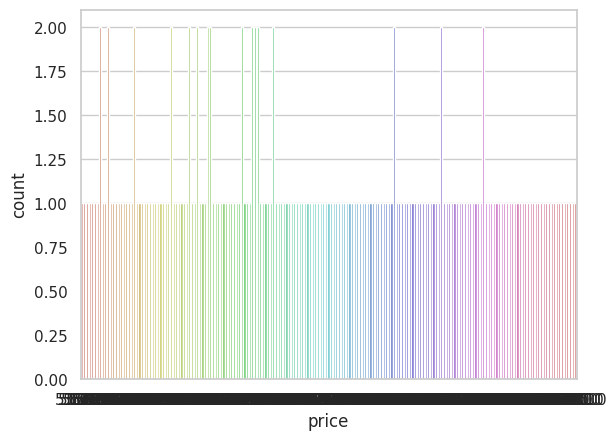

<Figure size 640x480 with 0 Axes>

In [8]:
sns.countplot(x='price', data=data, palette='hls') #untuk membuat count plot
plt.show() #digunakan untuk menampilkan plot
plt.savefig('count_plot') #digunakan untuk menyimpan plot ke dalam file gambar

In [9]:
count_default = len(data[data['car_ID']==1])#Menghitung jumlah baris
count_no_default = len(data[data['car_ID']==0])
pct_of_default = count_default/(count_no_default+count_default)#Menghitung persentase default dari total baris yang memiliki nilai 'car_ID' (1 atau 0).
print("\033[1m percentage of default is:", pct_of_default*100)#Mencetak persentase default dengan menggunakan teks cetak tebal (\033[1m) untuk penekanan
pct_of_no_default = count_no_default/(count_no_default+count_default)#menghitung presentase
print("\033[1m percentage of no-default is:", pct_of_no_default*100)

 percentage of default is: 100.0
 percentage of no-default is: 0.0


In [10]:
data.groupby('price').mean()#igunakan untuk mengelompokkan data berdasarkan nilai pada kolom 'price' dan menghitung rata-rata (mean) dari setiap kolom untuk setiap kelompok tersebut

<ipython-input-10-61885f284ee7>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('price').mean()


,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
price,,,,,,,,,,,,,,,
5118.0,139.0,2.0,93.7,156.9,63.4,53.7,2050.0,97.0,3.62,2.36,9.0,69.0,4900.0,31.0,36.0
5151.0,19.0,2.0,88.4,141.1,60.3,53.2,1488.0,61.0,2.91,3.03,9.5,48.0,5100.0,47.0,53.0
5195.0,51.0,1.0,93.1,159.1,64.2,54.1,1890.0,91.0,3.03,3.15,9.0,68.0,5000.0,30.0,31.0
5348.0,151.0,1.0,95.7,158.7,63.6,54.5,1985.0,92.0,3.05,3.03,9.0,62.0,4800.0,35.0,39.0
5389.0,77.0,2.0,93.7,157.3,64.4,50.8,1918.0,92.0,2.97,3.23,9.4,68.0,5500.0,37.0,41.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36880.0,18.0,0.0,110.0,197.0,70.9,56.3,3505.0,209.0,3.62,3.39,8.0,182.0,5400.0,15.0,20.0
37028.0,129.0,3.0,89.5,168.9,65.0,51.6,2800.0,194.0,3.74,2.90,9.5,207.0,5900.0,17.0,25.0
40960.0,74.0,0.0,120.9,208.1,71.7,56.7,3900.0,308.0,3.80,3.35,8.0,184.0,4500.0,14.0,16.0


In [11]:
data.groupby('CarName').mean()#untuk mencari nilai rata-rata

<ipython-input-11-965cf6a7d309>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('CarName').mean()


,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
CarName,,,,,,,,,,,,,,,,
Nissan versa,90.0,1.0,94.5,165.3,63.80,54.50,1889.0,97.0,3.15,3.29,9.4,69.0,5200.0,31.0,37.0,5499.0
alfa-romero Quadrifoglio,3.0,1.0,94.5,171.2,65.50,52.40,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
alfa-romero giulia,1.0,3.0,88.6,168.8,64.10,48.80,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
alfa-romero stelvio,2.0,3.0,88.6,168.8,64.10,48.80,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
audi 100 ls,4.0,2.0,99.8,176.6,66.20,54.30,2337.0,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
volvo 246,204.0,-1.0,109.1,188.8,68.90,55.50,3217.0,145.0,3.01,3.40,23.0,106.0,4800.0,26.0,27.0,22470.0
volvo 264gl,202.0,-1.5,106.7,188.8,68.05,55.85,3053.5,135.5,3.70,3.15,8.5,138.0,5250.0,18.0,23.5,20522.5
volvo diesel,200.0,-1.0,104.3,188.8,67.20,57.50,3157.0,130.0,3.62,3.15,7.5,162.0,5100.0,17.0,22.0,18950.0


In [12]:
data.groupby('car_ID').mean()# digunakan untuk mengelompokkan data berdasarkan nilai pada kolom 'car_ID' dan menghitung rata-rata (mean) dari setiap kolom numerik untuk setiap kelompok 'car_ID'

<ipython-input-12-fadd385865b8>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('car_ID').mean()


,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,
1,3.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
2,3.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
3,1.0,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
4,2.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
5,2.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,-1.0,109.1,188.8,68.9,55.5,2952.0,141.0,3.78,3.15,9.5,114.0,5400.0,23.0,28.0,16845.0
202,-1.0,109.1,188.8,68.8,55.5,3049.0,141.0,3.78,3.15,8.7,160.0,5300.0,19.0,25.0,19045.0
203,-1.0,109.1,188.8,68.9,55.5,3012.0,173.0,3.58,2.87,8.8,134.0,5500.0,18.0,23.0,21485.0


In [13]:
data.describe()#untuk menghasilkan ringkasan statistik deskriptif dari DataFrame atau Seri Pandas

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


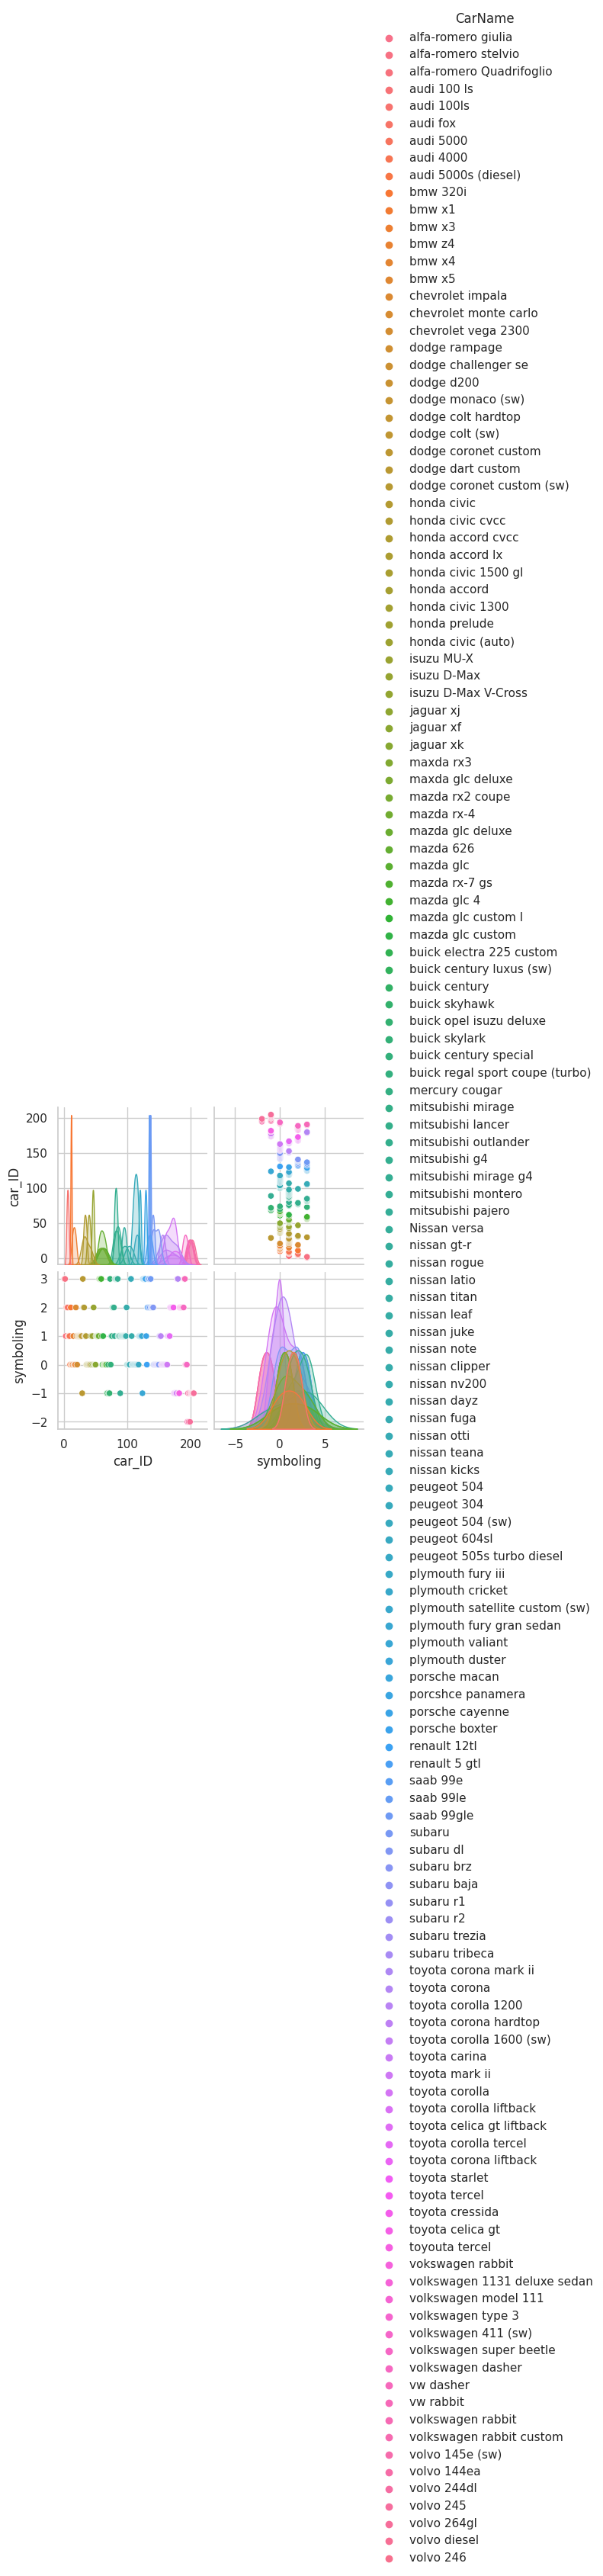

In [14]:
sns.pairplot(data.iloc[:, :7], hue='CarName') #untuk membuat matriks pair plo